In [57]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [58]:
file = "CSVs/AccidentsInjuriesCamerasSummary"
summary_df = pd.read_csv(file)
file2 = "CSVs/Crashes_w_Region.csv"
crashes_df = pd.read_csv(file2)
summary_df
file3 = "CSVs/Congestion.csv"
congestion_df = pd.read_csv(file3)
file4 = "CSVs/Chicago_Traffic_Tracker_-_Congestion_Estimates_by_Regions.csv"
regions_df = pd.read_csv(file4)

In [66]:
regions_df.columns

Index(['REGION', ' REGION_ID', ' WEST', ' EAST', ' SOUTH', ' NORTH',
       ' DESCRIPTION', ' CURRENT_SPEED', ' LAST_UPDATED'],
      dtype='object')

In [68]:
congestion_df = congestion_df.rename(columns={"REGION_ID" : "Region ID"})
summaryfull_df = pd.merge(summary_df, congestion_df, on = "Region ID", how = "left")

del summaryfull_df["BUS COUNT"]
del summaryfull_df["NUMBER OF READS"]
del summaryfull_df["SPEED"]
del summaryfull_df["Unnamed: 0"]

regions_df = regions_df.rename(columns={" REGION_ID" : "Region ID"})
summaryfull_df = pd.merge(summaryfull_df, regions_df, on = "Region ID", how = "left")

del summaryfull_df[" WEST"]
del summaryfull_df[" EAST"]
del summaryfull_df[" SOUTH"]
del summaryfull_df[" NORTH"]
del summaryfull_df[" DESCRIPTION"]
del summaryfull_df[" CURRENT_SPEED"]
del summaryfull_df[" LAST_UPDATED"]
summaryfull_df

,Region ID,Accidents,Injuries,Fatalities,Speed Cameras,Red Light Cameras,Total Cameras,Accidents Per Camera,Injuries Per Camera,Fatalities Per Camera,Injuries Per Accident,Fatalities Per Accident,congestion,REGION
0,1,5106,538.0,0.0,1.0,2.0,3.0,1702.000000,179.333333,0.000000,0.105366,0.000000,51.643062,Rogers Park - West Ridge
1,2,7593,1165.0,3.0,7.0,7.0,14.0,542.357143,83.214286,0.214286,0.153431,0.000395,39.112871,Far North West
2,3,10364,1388.0,5.0,10.0,10.0,20.0,518.200000,69.400000,0.250000,0.133925,0.000482,50.981392,North Park-Albany-Linconl Sq
3,4,5864,736.0,4.0,3.0,5.0,8.0,733.000000,92.000000,0.500000,0.125512,0.000682,54.117083,Edge Water-Uptown
4,5,12253,1834.0,7.0,16.0,15.0,31.0,395.258065,59.161290,0.225806,0.149678,0.000571,48.046807,Dunning-Portage-Belmont Cragn
5,6,9638,1326.0,5.0,10.0,13.0,23.0,419.043478,57.652174,0.217391,0.137580,0.000519,51.880135,Irving Park-Avondale-North Ctr
6,7,9184,1487.0,3.0,3.0,15.0,18.0,510.222222,82.611111,0.166667,0.161912,0.000327,53.041770,Hermosa-Logan Square
7,8,11375,1529.0,5.0,8.0,8.0,16.0,710.937500,95.562500,0.312500,0.134418,0.000440,54.490629,Lincoln Park-Lake View
8,9,5991,1266.0,5.0,3.0,3.0,6.0,998.500000,211.000000,0.833333,0.211317,0.000835,47.325716,Austin
9,10,12704,3398.0,25.0,14.0,10.0,24.0,529.333333,141.583333,1.041667,0.267475,0.001968,51.527209,Humboldt-Garfield Prk E/W


In [77]:
summaryfull_df["congestion"] = summaryfull_df["congestion"]/100
summaryfull_df["Accidents Scaled"] = summaryfull_df["Accidents"]/summaryfull_df["congestion"]
summaryfull_df["Injuries Scaled"] = summaryfull_df["Injuries"]/summaryfull_df["congestion"]
summaryfull_df["Fatalities Scaled"] = summaryfull_df["Fatalities"]/summaryfull_df["congestion"]
summaryfull_df

,Region ID,Accidents,Injuries,Fatalities,Speed Cameras,Red Light Cameras,Total Cameras,Accidents Per Camera,Injuries Per Camera,Fatalities Per Camera,Injuries Per Accident,Fatalities Per Accident,congestion,REGION,Accidents Scaled,Injuries Scaled,Fatalities Scaled
0,1,5106,538.0,0.0,1.0,2.0,3.0,1702.000000,179.333333,0.000000,0.105366,0.000000,0.516431,Rogers Park - West Ridge,9887.097797,1041.766278,0.000000
1,2,7593,1165.0,3.0,7.0,7.0,14.0,542.357143,83.214286,0.214286,0.153431,0.000395,0.391129,Far North West,19413.046724,2978.559125,7.670109
2,3,10364,1388.0,5.0,10.0,10.0,20.0,518.200000,69.400000,0.250000,0.133925,0.000482,0.509814,North Park-Albany-Linconl Sq,20328.985750,2722.561966,9.807500
3,4,5864,736.0,4.0,3.0,5.0,8.0,733.000000,92.000000,0.500000,0.125512,0.000682,0.541171,Edge Water-Uptown,10835.765169,1360.014182,7.391381
4,5,12253,1834.0,7.0,16.0,15.0,31.0,395.258065,59.161290,0.225806,0.149678,0.000571,0.480468,Dunning-Portage-Belmont Cragn,25502.214933,3817.111090,14.569126
5,6,9638,1326.0,5.0,10.0,13.0,23.0,419.043478,57.652174,0.217391,0.137580,0.000519,0.518801,Irving Park-Avondale-North Ctr,18577.438087,2555.891565,9.637600
6,7,9184,1487.0,3.0,3.0,15.0,18.0,510.222222,82.611111,0.166667,0.161912,0.000327,0.530418,Hermosa-Logan Square,17314.655939,2803.450934,5.655920
7,8,11375,1529.0,5.0,8.0,8.0,16.0,710.937500,95.562500,0.312500,0.134418,0.000440,0.544906,Lincoln Park-Lake View,20875.149151,2805.987082,9.175890
8,9,5991,1266.0,5.0,3.0,3.0,6.0,998.500000,211.000000,0.833333,0.211317,0.000835,0.473257,Austin,12659.079418,2675.078375,10.565080
9,10,12704,3398.0,25.0,14.0,10.0,24.0,529.333333,141.583333,1.041667,0.267475,0.001968,0.515272,Humboldt-Garfield Prk E/W,24654.934996,6594.574080,48.518055


In [62]:
congestion_df.columns

Index(['Unnamed: 0', 'REGION_ID', 'BUS COUNT', 'NUMBER OF READS', 'SPEED',
       'congestion'],
      dtype='object')

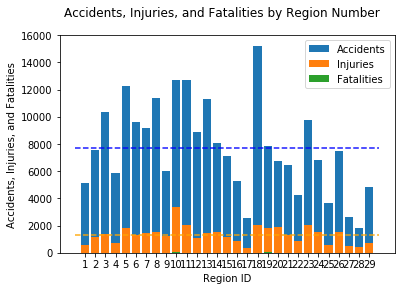

In [79]:
fig, ax = plt.subplots()
labels = ["Accidents", "Injuries", "Fatalities"]
ax.bar(summary_df["Region ID"], summary_df["Accidents"])
ax.bar(summary_df["Region ID"], summary_df["Injuries"])
ax.bar(summary_df["Region ID"], summary_df["Fatalities"])
fig.suptitle("Accidents, Injuries, and Fatalities by Region Number")
plt.xticks(summary_df["Region ID"])
plt.ylabel("Accidents, Injuries, and Fatalities")
plt.xlabel("Region ID")
plt.legend(loc = "best", labels = labels)

averageaccidents = summary_df["Accidents"].mean()
averageinjuries = summary_df["Injuries"].mean()
averagefatalities = summary_df["Fatalities Per Accident"].mean()
plt.hlines(averageaccidents, 0, 30, alpha=.90, linestyle = "--", color = "blue")
plt.hlines(averageinjuries, 0, 30, alpha=.90, linestyle = "--", color = "orange")
plt.savefig("Images/Accidents_by_Region")

In [74]:
summaryfull_df.columns

Index(['Region ID', 'Accidents', 'Injuries', 'Fatalities', 'Speed Cameras',
       'Red Light Cameras', 'Total Cameras', 'Accidents Per Camera',
       'Injuries Per Camera', 'Fatalities Per Camera', 'Injuries Per Accident',
       'Fatalities Per Accident', 'congestion', 'REGION', 'Accidents Scaled',
       'Injuries Scaled', 'Fatalities Scaled'],
      dtype='object')

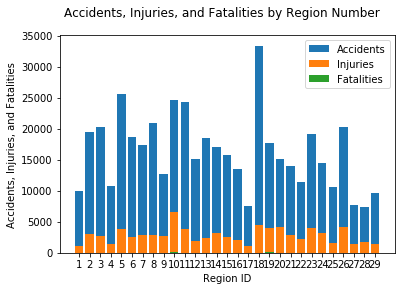

In [81]:
fig, ax = plt.subplots()
labels = ["Accidents", "Injuries", "Fatalities"]
ax.bar(summaryfull_df["Region ID"], summaryfull_df["Accidents Scaled"])
ax.bar(summaryfull_df["Region ID"], summaryfull_df["Injuries Scaled"])
ax.bar(summaryfull_df["Region ID"], summaryfull_df["Fatalities Scaled"])
fig.suptitle("Accidents, Injuries, and Fatalities by Region Number")
plt.xticks(summary_df["Region ID"])
plt.ylabel("Accidents, Injuries, and Fatalities")
plt.xlabel("Region ID")
plt.legend(loc = "best", labels = labels)

#averageaccidents = summary_df["Accidents Scaled"].mean()
#averageinjuries = summary_df["Injuries Scaled"].mean()
#averagefatalities = summary_df["Fatalities Scaled"].mean()
#plt.hlines(averageaccidents, 0, 30, alpha=.90, linestyle = "--", color = "blue")
#plt.hlines(averageinjuries, 0, 30, alpha=.90, linestyle = "--", color = "orange")
#plt.savefig("Images/Accidents_by_Region_Scaled")

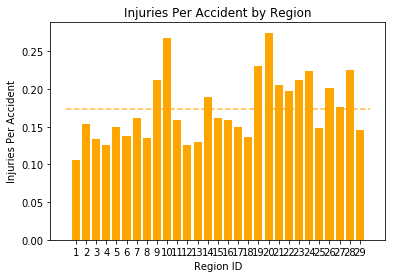

In [35]:
plt.bar(summary_df["Region ID"], summary_df["Injuries Per Accident"], color = "orange")
plt.xticks(summary_df["Region ID"])
plt.xlabel("Region ID")
plt.ylabel("Injuries Per Accident")
plt.title("Injuries Per Accident by Region")
plt.hlines(summary_df["Injuries Per Accident"].mean(), 0, 30, alpha=.75, linestyle = "--", color = "orange")
plt.savefig("Images/Injuries_Per_Accident_by_Region")

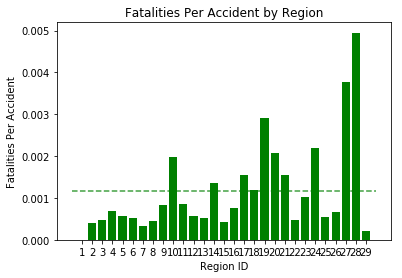

In [37]:
plt.bar(summary_df["Region ID"], summary_df["Fatalities Per Accident"], color = "green")
plt.xticks(summary_df["Region ID"])
plt.xlabel("Region ID")
plt.ylabel("Fatalities Per Accident")
plt.title("Fatalities Per Accident by Region")
plt.hlines(summary_df["Fatalities Per Accident"].mean(), 0, 30, alpha=.75, linestyle = "--", color = "green")
plt.savefig("Images/Fatalities_Per_Accident_by_Region")

In [17]:
summary_df["IA/C"] = summary_df["Injuries Per Accident"]/summary_df["Total Cameras"]
summary_df["FA/C"] = summary_df["Fatalities Per Accident"]/summary_df["Total Cameras"]


In [3]:
percamera = summary_df[["Region ID", "Accidents Per Camera", "Injuries Per Camera", "Fatalities Per Camera"]]
percamera = percamera[percamera["Region ID"] != 17]
percamera

,Region ID,Accidents Per Camera,Injuries Per Camera,Fatalities Per Camera
0,1,1702.000000,179.333333,0.000000
1,2,542.357143,83.214286,0.214286
2,3,518.200000,69.400000,0.250000
3,4,733.000000,92.000000,0.500000
4,5,395.258065,59.161290,0.225806
5,6,419.043478,57.652174,0.217391
6,7,510.222222,82.611111,0.166667
7,8,710.937500,95.562500,0.312500
8,9,998.500000,211.000000,0.833333
9,10,529.333333,141.583333,1.041667


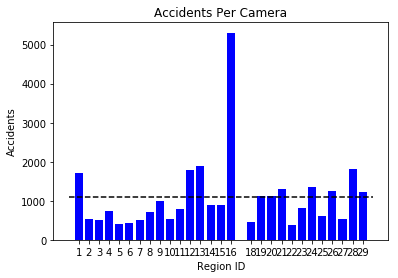

In [19]:
regions = percamera["Region ID"]

percamera.set_index("Region ID")
fig, ax = plt.subplots()
plt.bar(percamera["Region ID"], percamera["Accidents Per Camera"], color = "blue")
plt.title("Accidents Per Camera")
plt.ylabel("Accidents")
plt.xlabel("Region ID")
plt.xticks(regions)
plt.hlines((percamera["Accidents Per Camera"].mean()), 0, 30, linestyle = "--")
plt.savefig("Images/AccidentsPerCamera.png")

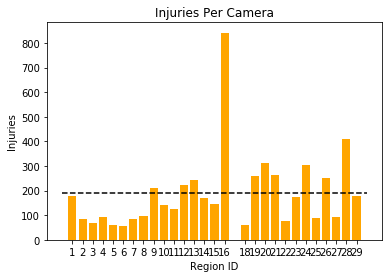

In [5]:
plt.bar(percamera["Region ID"], percamera["Injuries Per Camera"], color = "orange")
plt.title("Injuries Per Camera")
plt.ylabel("Injuries")
plt.xlabel("Region ID")
plt.xticks(regions)
plt.hlines((percamera["Injuries Per Camera"].mean()), 0, 30, linestyle = "--")
plt.savefig("Images/InjuriesPerCamera.png")

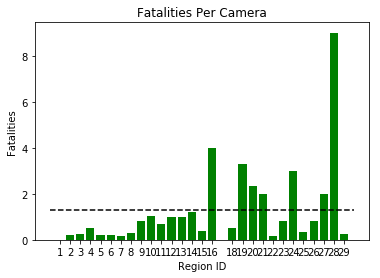

In [6]:
plt.bar(percamera["Region ID"], percamera["Fatalities Per Camera"], color = "green")
plt.title("Fatalities Per Camera")
plt.ylabel("Fatalities")
plt.xlabel("Region ID")
plt.xticks(regions)
plt.hlines((percamera["Fatalities Per Camera"].mean()), 0, 30, linestyle = "--")
plt.savefig("Images/FatalitiesPerCamera.png")

-0.13106524415236243 -0.2478356200575027
0.49796578793609847 0.19488500908531609


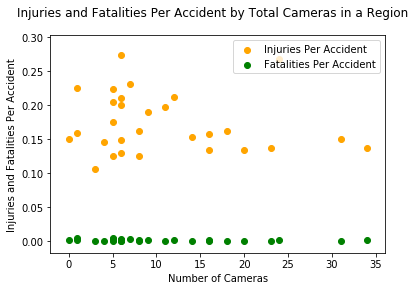

In [82]:
fig, ax = plt.subplots()
ax.scatter(summary_df["Total Cameras"], summary_df["Injuries Per Accident"], color = "orange")
ax.scatter(summary_df["Total Cameras"], summary_df["Fatalities Per Accident"], color = "green")
fig.suptitle("Injuries and Fatalities Per Accident by Total Cameras in a Region")
plt.ylabel("Injuries and Fatalities Per Accident")
plt.xlabel("Number of Cameras")
plt.legend(loc = "best")

(slope, intercept, r, p, __) = stats.linregress(summary_df["Total Cameras"], summary_df["Injuries Per Accident"])
(slope2, intercept2, r2, p2, __) = stats.linregress(summary_df["Total Cameras"], summary_df["Fatalities Per Accident"])                                

line1 = (slope * summary_df["Total Cameras"] + intercept)
line2 = (slope2 * summary_df["Total Cameras"] + intercept2)

#plt.plot(line1, color = "orange", linestyle = "--")
#plt.plot(line2, color = "green", linestyle = "--")
print(r, r2)
print(p, p2)

plt.savefig("Images/InjuriesFatalitiesbyCameras")

-0.13106524415236243 -0.2478356200575027
0.49796578793609847 0.19488500908531609


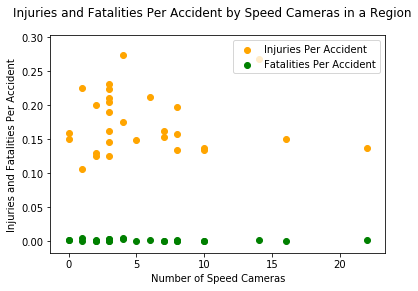

In [84]:
fig, ax = plt.subplots()
ax.scatter(summary_df["Speed Cameras"], summary_df["Injuries Per Accident"], color = "orange")
ax.scatter(summary_df["Speed Cameras"], summary_df["Fatalities Per Accident"], color = "green")
fig.suptitle("Injuries and Fatalities Per Accident by Speed Cameras in a Region")
plt.ylabel("Injuries and Fatalities Per Accident")
plt.xlabel("Number of Speed Cameras")
plt.legend(loc = "best")
(slope, intercept, r, p, __) = stats.linregress(summary_df["Total Cameras"], summary_df["Injuries Per Accident"])
(slope2, intercept2, r2, p2, __) = stats.linregress(summary_df["Total Cameras"], summary_df["Fatalities Per Accident"])                                

line1 = (slope * summary_df["Speed Cameras"] + intercept)
line2 = (slope2 * summary_df["Speed Cameras"] + intercept2)

#plt.plot(line1, color = "orange", linestyle = "--")
#plt.plot(line2, color = "green", linestyle = "--")
print(r, r2)
print(p, p2)

plt.savefig("Images/InjuriesFatalitiesSpeedCameras.png")

-0.18458218512409 -0.31402171414898156
0.3377841892436859 0.09712771117818499


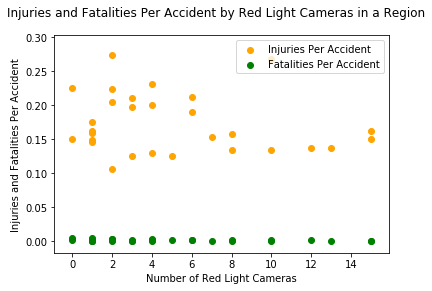

In [85]:
fig, ax = plt.subplots()
ax.scatter(summary_df["Red Light Cameras"], summary_df["Injuries Per Accident"], color = "orange")
ax.scatter(summary_df["Red Light Cameras"], summary_df["Fatalities Per Accident"], color = "green")
fig.suptitle("Injuries and Fatalities Per Accident by Red Light Cameras in a Region")
plt.ylabel("Injuries and Fatalities Per Accident")
plt.xlabel("Number of Red Light Cameras")
plt.legend(loc = "best")

(slope, intercept, r, p, __) = stats.linregress(summary_df["Red Light Cameras"], summary_df["Injuries Per Accident"])
(slope2, intercept2, r2, p2, __) = stats.linregress(summary_df["Red Light Cameras"], summary_df["Fatalities Per Accident"])                                

line1 = (slope * (summary_df["Red Light Cameras"]) + intercept)
line2 = (slope2 * (summary_df["Red Light Cameras"]) + intercept2)

#plt.plot(line1, color = "orange", linestyle = "--")
#plt.plot(line2, color = "green", linestyle = "--")
print(r, r2)
print(p, p2)
plt.savefig("Images/InjuresFatalitiesRedLight.png")

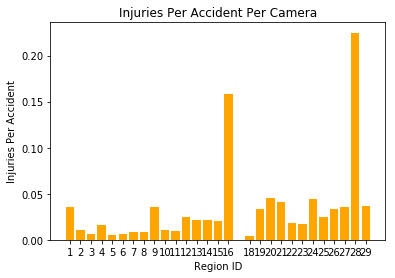

In [43]:


plt.bar(summary_df["Region ID"], summary_df["IA/C"], color = "orange")
plt.title("Injuries Per Accident Per Camera")
plt.ylabel("Injuries Per Accident")
plt.xlabel("Region ID")
plt.xticks(regions)
plt.hlines((summary_df["IA/C"].mean()), 0, 30, linestyle = "--")
plt.savefig("Images/InjuriesPerAccidentPerCamera.png")



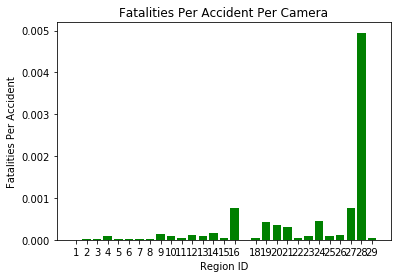

In [20]:
fig, ax = plt.subplots()
plt.bar(summary_df["Region ID"], summary_df["FA/C"], color = "green")
plt.title("Fatalities Per Accident Per Camera")
plt.ylabel("Fatalities Per Accident")
plt.xlabel("Region ID")
plt.xticks(regions)
plt.hlines((summary_df["FA/C"].mean()), 0, 30, linestyle = "--")
plt.savefig("Images/FatalitiesPerAccidentPerCamera.png")

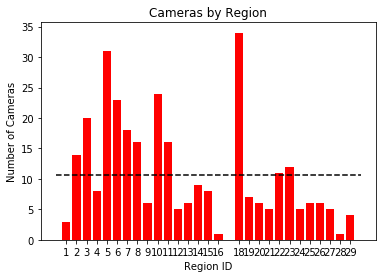

In [21]:
plt.bar(summary_df["Region ID"], summary_df["Total Cameras"], color = "red")
plt.title("Cameras by Region")
plt.ylabel("Number of Cameras")
plt.xlabel("Region ID")
plt.xticks(regions)
plt.hlines((summary_df["Total Cameras"].mean()), 0, 30, linestyle = "--")
plt.savefig("Images/TotalCamerasBar.png")

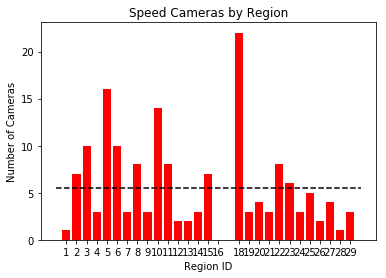

In [22]:
plt.bar(summary_df["Region ID"], summary_df["Speed Cameras"], color = "red")
plt.title("Speed Cameras by Region")
plt.ylabel("Number of Cameras")
plt.xlabel("Region ID")
plt.xticks(regions)
plt.hlines((summary_df["Speed Cameras"].mean()), 0, 30, linestyle = "--")
plt.savefig("Images/SpeedCamerasBar.png")

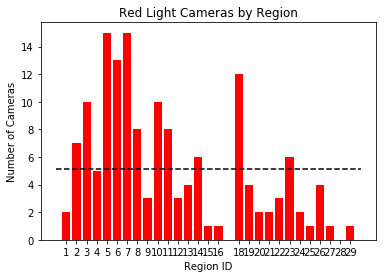

In [23]:
plt.bar(summary_df["Region ID"], summary_df["Red Light Cameras"], color = "red")
plt.title("Red Light Cameras by Region")
plt.ylabel("Number of Cameras")
plt.xlabel("Region ID")
plt.xticks(regions)
plt.hlines((summary_df["Red Light Cameras"].mean()), 0, 30, linestyle = "--")
plt.savefig("Images/RedlightCamerasBar.png")